# Linear Regression Notebook
This notebook contains all the linear regression modelling and analysis done for the project. The purpose was to find the best linear regression model that best explained our outcome variable. Our outcome variable is the number of goals met, as determined by the PA Health Department for fetal mortality rate, infant mortality rate, and and percent of pre-term live births. The linear regression model will be used to inform the areas of focus and weights in the optimization portion of this project.

### Setting up and Imputations

In [1]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler


In [101]:
t = pd.read_csv('./preprocessing_and_eda/original_sample.csv')
feats = t[['county_name', 'population', 'pop_change_2010', 'perc_under_18',
       'perc_csec', 'perc_prenat_1tri', 'perc_non_smoke', 'fert_15_44',
       'birth_rate_15_19', 'birth_rate_20_24', 'birth_rate_25_29',
       'birth_rate_30_34', 'birth_date_35_39', 'birth_rate_40_44',
       'all_cause_death', 'chlam_per_100000', 'gono_per_100000', 'perc_smoker',
       'hiv_tested', 'perc_no_healthins', 'perc_obese', 'perc_routine_checkup',
       'beds_per_1000', 'inpatient_occupancy_rate', 'goals_met',
       'population_White', 'population_Black', 'population_Native',
       'population_Asian', 'population_NativeHawaiian_PacificIslander',
       'population_OtherRace', 'adi_staterank_mean']].drop(columns='county_name')
feats.replace({'.': None}, inplace=True)

In [92]:
merged = pd.concat([t[['county_name']], feats], axis=1).rename(columns={'adi_staterank_mean': 'ADI_STATERNK_INT_mean'})
merged

,county_name,population,pop_change_2010,perc_under_18,perc_csec,perc_prenat_1tri,perc_non_smoke,fert_15_44,birth_rate_15_19,birth_rate_20_24,...,beds_per_1000,inpatient_occupancy_rate,goals_met,population_White,population_Black,population_Native,population_Asian,population_NativeHawaiian_PacificIslander,population_OtherRace,ADI_STATERNK_INT_mean
0,Adams,103009.0,1.6,19.9,29.5,75.6,87.7,55.7,14.3,59.8,...,0.7,62.5,2,0.928001,0.015912,0.001501,0.007055,0.000000,0.022421,3.627907
1,Allegheny,1216045.0,-0.6,18.8,29.7,86.9,90.8,55.1,10.8,46.1,...,3.8,72.7,1,0.790337,0.129957,0.001179,0.039232,0.000421,0.008208,5.867155
2,Armstrong,64735.0,-6.1,19.0,33.7,75.0,79.6,57.8,19.8,89.6,...,2.2,31.3,0,0.973300,0.008660,0.000245,0.003075,0.000000,0.001331,7.484848
3,Beaver,163929.0,-3.9,19.1,33.7,79.6,83.5,58.5,15.4,69.6,...,1.7,48.2,1,0.897294,0.059285,0.000910,0.004606,0.000310,0.003848,6.663934
4,Bedford,47888.0,-3.8,19.2,27.5,77.9,83.3,62.2,18.0,103.3,...,0.5,42.9,1,0.973377,0.010321,0.001288,0.002388,0.000000,0.001350,6.947368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Washington,206865.0,-0.5,19.4,29.2,80.0,82.8,56.2,11.9,58.2,...,2.5,48.1,2,0.929887,0.032765,0.000261,0.009730,0.000304,0.004124,5.939189
63,Wayne,51361.0,-2.8,16.2,32.3,79.0,83.4,56.1,12.9,63.4,...,1.6,41.3,1,0.930151,0.034271,0.002458,0.007119,0.000351,0.003413,5.000000
64,Westmoreland,348899.0,-4.5,18.1,28.5,82.9,84.5,53.9,11.1,55.4,...,1.3,59.5,3,0.943057,0.024147,0.000562,0.010316,0.000086,0.002290,6.164103
65,Wyoming,26794.0,-5.2,19.4,32.4,71.2,76.9,56.8,16.3,83.4,...,0.4,20.8,0,0.931014,0.018059,0.001699,0.004358,0.000000,0.003250,5.318182


In [68]:
#merged.to_csv('parameters.csv')

In [112]:
y = merged['goals_met']
X = merged.drop(columns = ['goals_met', 'county_name'])
feat_names = X.columns

In [114]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = pd.DataFrame(imputer.transform(X), columns = feat_names)

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=123)
X_train.head(5)

,population,pop_change_2010,perc_under_18,perc_csec,perc_prenat_1tri,perc_non_smoke,fert_15_44,birth_rate_15_19,birth_rate_20_24,birth_rate_25_29,...,perc_routine_checkup,beds_per_1000,inpatient_occupancy_rate,population_White,population_Black,population_Native,population_Asian,population_NativeHawaiian_PacificIslander,population_OtherRace,ADI_STATERNK_INT_mean
18,64964.0,-3.5,17.1,28.1,75.0,81.9,41.1,9.1,33.0,102.8,...,83.0,2.6,22.7,0.947240,0.017067,0.000612,0.011516,0.001606,0.006637,6.140000
13,162385.0,5.5,14.7,24.7,76.6,92.0,31.7,2.8,13.7,65.1,...,83.0,1.6,50.2,0.872720,0.034444,0.000647,0.062503,0.000148,0.004135,3.980769
63,51361.0,-2.8,16.2,32.3,79.0,83.4,56.1,12.9,63.4,109.6,...,88.0,1.6,41.3,0.930151,0.034271,0.002458,0.007119,0.000351,0.003413,5.000000
29,36233.0,-6.3,19.5,28.7,75.7,72.7,59.1,18.0,102.5,120.9,...,87.0,0.6,45.7,0.932984,0.032041,0.000000,0.002988,0.000192,0.004194,6.740741
42,109424.0,-6.2,19.1,28.6,69.7,78.7,58.5,17.2,75.4,124.9,...,87.0,3.2,37.5,0.907138,0.060750,0.001285,0.007601,0.000045,0.003022,7.505376


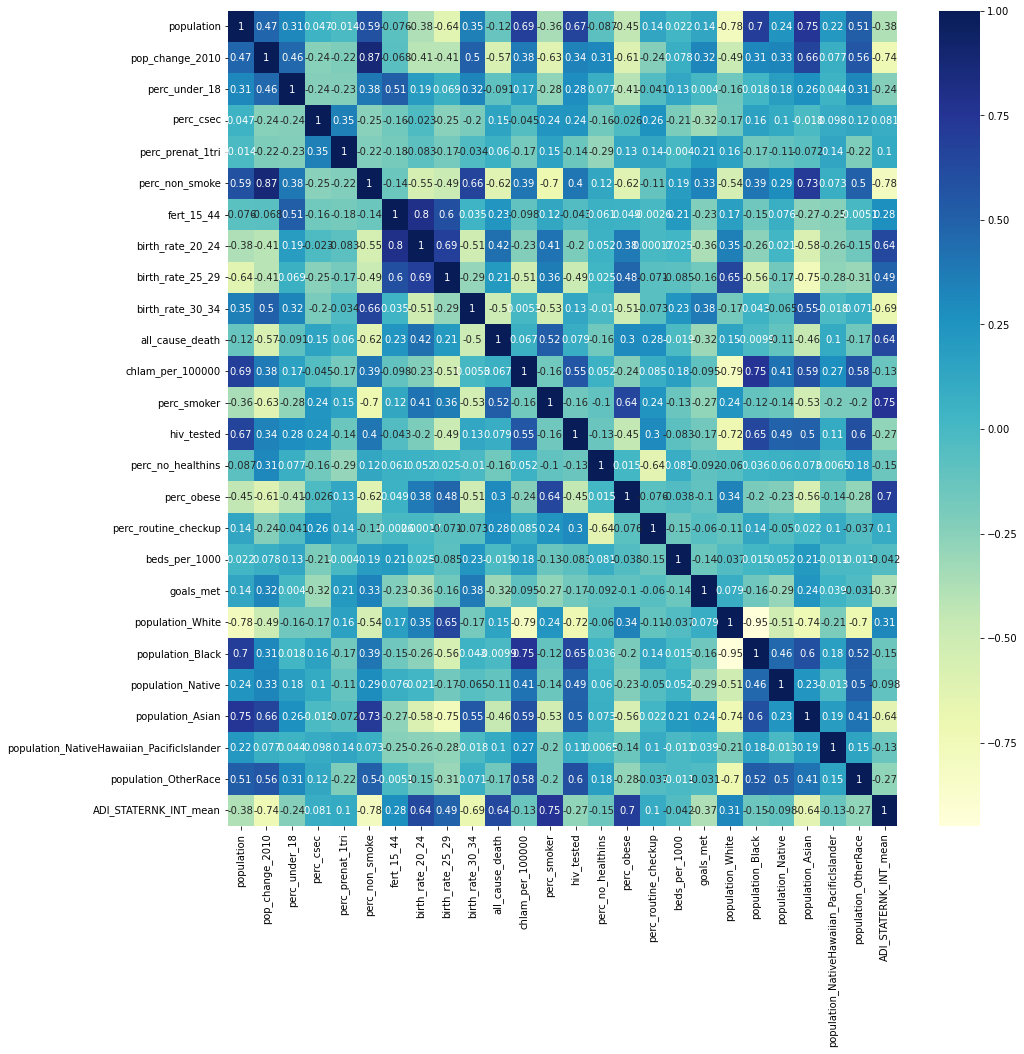

In [117]:
fig, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(merged.corr(), cmap="YlGnBu", annot=True)

In [118]:
lm = LinearRegression() #creating linear regression object
lm.fit(X_train, y_train) #fitting train data to model
print("Train R-squared: ", lm.score(X_train, y_train)) #getting train model R-squared
print("Train MSE: %.2f"% mean_squared_error(y_train, lm.predict(X_train))) #getting MSE for train data

cross_val = KFold(n_splits=10, random_state=None, shuffle=False) #creating k-fold cross validation object
score_lm = cross_val_score(lm, X_train, y_train, 
                             scoring="neg_mean_squared_error", cv=cross_val, n_jobs=-1) #getting CV scores for linear regression
lm_MSE_CV = np.abs(np.mean(score_lm)) #getting average CV error for linear regression
print("Linear Regression CV error:", lm_MSE_CV) #printing average CV error for linear regression

Train R-squared:  0.8984736083471372
Train MSE: 0.10
Linear Regression CV error: 3.71708863049086


Train R-squared:  0.6127750443819879
Train MSE: 0.39
Linear Regression CV error: 3.71708863049086


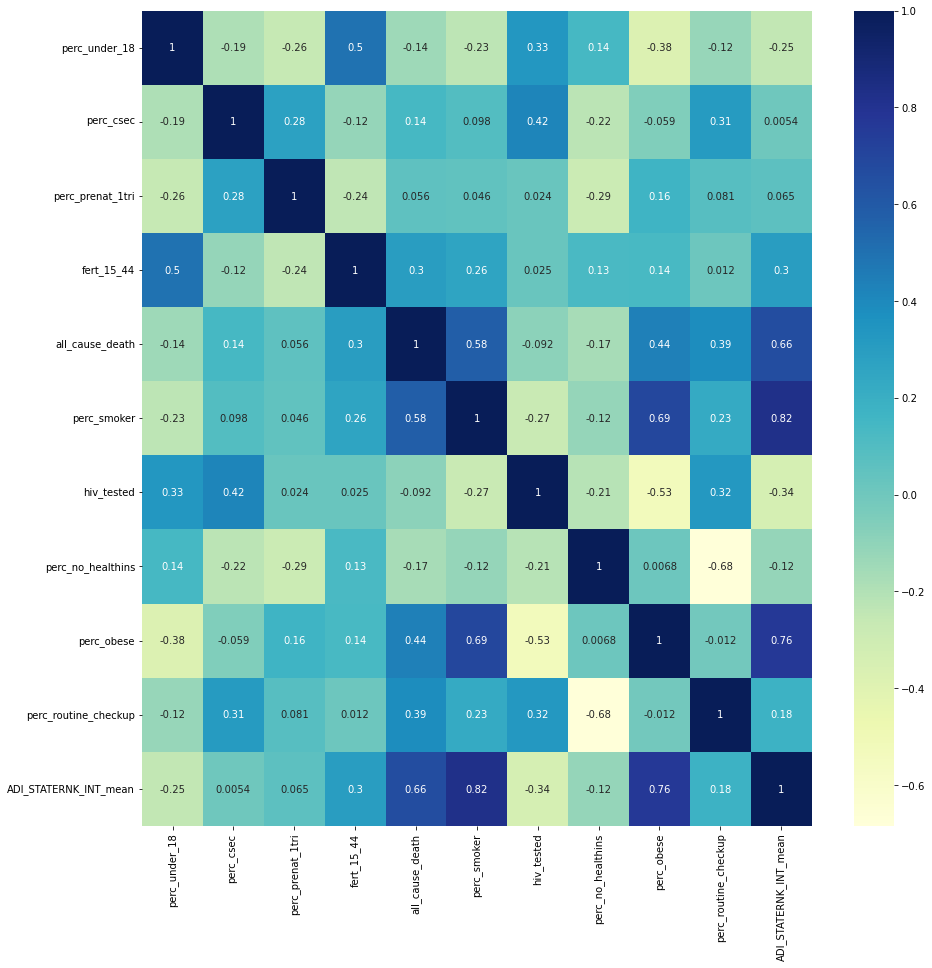

In [119]:
X_train_corr  = X_train.drop(columns = ['population', 'population_White', 'perc_non_smoke', 'population_Black', 'population_Native', 'population_Asian', 'population_NativeHawaiian_PacificIslander', 'population_OtherRace', 'beds_per_1000', 'gono_per_100000', 
                                        'chlam_per_100000', 'birth_rate_15_19', 'birth_rate_20_24', 'birth_rate_25_29', 'birth_rate_30_34', 'birth_date_35_39', 'birth_rate_40_44', 'pop_change_2010', 'inpatient_occupancy_rate'])
X_test_corr  = X_test.drop(columns = ['population', 'population_White', 'perc_non_smoke', 'population_Black', 'population_Native', 'population_Asian', 'population_NativeHawaiian_PacificIslander', 'population_OtherRace', 'beds_per_1000', 'gono_per_100000', 
                                        'chlam_per_100000', 'pop_change_2010','birth_rate_15_19', 'birth_rate_20_24', 'birth_rate_25_29', 'birth_rate_30_34', 'birth_date_35_39', 'birth_rate_40_44', 'inpatient_occupancy_rate'])

lm = LinearRegression() #creating linear regression object
lm.fit(X_train_corr, y_train) #fitting train data to model
print("Train R-squared: ", lm.score(X_train_corr, y_train)) #getting train model R-squared
print("Train MSE: %.2f"% mean_squared_error(y_train, lm.predict(X_train_corr))) #getting MSE for train data!

cross_val = KFold(n_splits=10, random_state=None, shuffle=False) #creating k-fold cross validation object
score_lm = cross_val_score(lm, X_train_corr, y_train, 
                             scoring="neg_mean_squared_error", cv=cross_val, n_jobs=-1) #getting CV scores for linear regression
lm_MSE_CV_corr = np.abs(np.mean(score_lm)) #getting average CV error for linear regression
print("Linear Regression CV error:", lm_MSE_CV) #printing average CV error for linear regression

fig, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(X_train_corr.corr(), cmap="YlGnBu", annot=True)

In [120]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
lm_poly = LinearRegression(normalize=True) #creating linear regression object
cross_val = KFold(n_splits=10, random_state=None, shuffle=False) #setting up 10-fold cross-validation
errors = [] #creating empty list to score average CV errors

for i in range(2,4): #iterating through degrees 2-7
    poly = PolynomialFeatures(degree=i) #polynomial transformation object
    X_poly_train = poly.fit_transform(X_train) #transforming training predictors
    model = lm_poly.fit(X_poly_train, y_train) #fitting polynomial predictors to regression
    scores = cross_val_score(model, X_poly_train, y_train, 
                             scoring="neg_mean_squared_error", cv=cross_val, n_jobs=-1) #getting errors across 10 folds
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", standard_dev: " + str(np.std(scores)))
    errors.append(np.mean(np.abs(scores))) #appending average MSE to errors list

Degree-2 polynomial MSE: 3.236286220725424, standard_dev: 5.290195031998255
Degree-3 polynomial MSE: 3.0478847008893024, standard_dev: 4.360904788452032


In [121]:
poly_minerror = np.min((errors)) #storing the min CV error
print('Minimum CV error for polynomial regression (degree=2):', poly_minerror)

Minimum CV error for polynomial regression (degree=2): 3.0478847008893024


In [122]:
from sklearn.feature_selection import SequentialFeatureSelector
model= LinearRegression(normalize=True) #creating model object
predictors = X_train.columns.values #saving column names of predictors
CV_scores = [] #creating empty list to score average CV errors

for i in range(1, np.shape(X_train)[1]): #looping through n-1 features
    print("Num Features:",i)
    sfs = SequentialFeatureSelector(model, 
                                    n_features_to_select = i, 
                                    direction="forward",
                                    scoring='neg_mean_squared_error',
                                    cv=10) 
    sfs = sfs.fit(X_train, y_train) #selecting i features using training data
    print("\tFeatures selected:", list(predictors[sfs.get_support()])) #getting selected features for given i
    x_subset = sfs.transform(X_train) #transforming predictors dataframe based on selected features
    CV_error = np.mean(cross_val_score(model, x_subset, y_train, cv=10, scoring='neg_mean_squared_error'))
    #getting mean cv score for linear regression fitted to training data with selected features
    CV_scores.append(CV_error) #appending average CV error to CV scores list
    print("\tCV_Error: %10.3f"%CV_error)

Num Features: 1
	Features selected: ['ADI_STATERNK_INT_mean']
	CV_Error:     -0.812
Num Features: 2
	Features selected: ['population_Native', 'ADI_STATERNK_INT_mean']
	CV_Error:     -0.696
Num Features: 3
	Features selected: ['perc_prenat_1tri', 'population_Native', 'ADI_STATERNK_INT_mean']
	CV_Error:     -0.598
Num Features: 4
	Features selected: ['perc_prenat_1tri', 'perc_smoker', 'population_Native', 'ADI_STATERNK_INT_mean']
	CV_Error:     -0.551
Num Features: 5
	Features selected: ['perc_csec', 'perc_prenat_1tri', 'perc_smoker', 'population_Native', 'ADI_STATERNK_INT_mean']
	CV_Error:     -0.478
Num Features: 6
	Features selected: ['population', 'perc_csec', 'perc_prenat_1tri', 'perc_smoker', 'population_Native', 'ADI_STATERNK_INT_mean']
	CV_Error:     -0.458
Num Features: 7
	Features selected: ['population', 'perc_csec', 'perc_prenat_1tri', 'perc_smoker', 'beds_per_1000', 'population_Native', 'ADI_STATERNK_INT_mean']
	CV_Error:     -0.423
Num Features: 8
	Features selected: ['popu

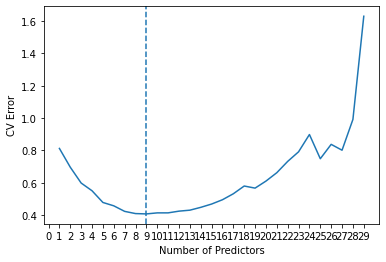

In [135]:
CV_scores =np.abs(CV_scores) #get the absolute value of the CV errors since we used negative MSE above
MSE_LR = np.min(CV_scores) #save the lowest MSE

x_graph = list(range(1,len(predictors))) #store range of features
best_CV = (np.where(CV_scores == np.min(CV_scores))[0])+1 #storing lowest CV error
plt.plot(x_graph,CV_scores) #plotting CV error for each # of features
plt.xlabel("Number of Predictors") #labeling x axis
plt.xticks(range(len(predictors))) #specifying x ticks
plt.ylabel("CV Error") #labeling y axis
plt.axvline(x=best_CV,linestyle='--') #adding vertical line for lowest CV error
plt.show() #showing plot

In [124]:
X_train_fs = X_train[['perc_csec', 'perc_prenat_1tri', 'birth_rate_15_19', 'birth_rate_20_24', 'birth_rate_25_29', 'birth_rate_30_34', 'birth_date_35_39', 'gono_per_100000', 'perc_smoker', 'hiv_tested', 'perc_no_healthins', 'perc_obese', 'beds_per_1000', 'population_White', 'population_Black', 'population_Native', 'population_Asian', 'population_OtherRace', 'ADI_STATERNK_INT_mean']]

X_test_fs = X_test[['perc_csec', 'perc_prenat_1tri', 'birth_rate_15_19', 'birth_rate_20_24', 'birth_rate_25_29', 'birth_rate_30_34', 'birth_date_35_39', 'gono_per_100000', 'perc_smoker', 'hiv_tested', 'perc_no_healthins', 'perc_obese', 'beds_per_1000', 'population_White', 'population_Black', 'population_Native', 'population_Asian', 'population_OtherRace', 'ADI_STATERNK_INT_mean']]

In [125]:
lm = LinearRegression() #creating linear regression object
lm.fit(X_train_fs, y_train) #fitting train data to model
print("Train R-squared: ", lm.score(X_train_fs, y_train)) #getting train model R-squared
print("Train MSE: %.2f"% mean_squared_error(y_train, lm.predict(X_train_fs))) #getting MSE for train data


Train R-squared:  0.8126469782705806
Train MSE: 0.19


In [127]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
feature_names=X_train.columns.values #storing feature names

model_ridge = Ridge(normalize=True) #creating ridge model object
errors= [] #empty list to store errors
coef = [] #empty list to store coefficient estimates for graphing 


alphas = np.logspace(-5, 5, 300) #setting logspace range for alphas
for a in alphas: #iterating through alphas
    model_ridge.set_params(alpha=a) #setting alpha parameter for ridge model
    model_ridge.fit(X_train, y_train) #fitting model to training data
    CV_error = np.mean(cross_val_score(model_ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    #getting average CV error for specific alpha using training data
    errors.append(CV_error) #storing average CV error in list
    coef.append(model_ridge.coef_) #storing coefficient estimates in list for graphing later
    
errors = np.abs(errors) #storing absolute value of errors bc we used neg MSE above
print("Min error: ", np.min(errors)) #printing min CV error
ridge_ME = np.min(errors) #storing min error for model selection later
index_ME = (np.where(errors == np.min(errors))[0]) #storing index for min CV error to get best alpha
print("Best alpha: ", alphas[index_ME]) #printing best alpha

Min error:  0.6416030575037481
Best alpha:  [0.35358594]


In [128]:
model_lasso = Lasso(normalize=True, max_iter = 100000) #creating lasso model object
errors_lasso = [] #empty list to store errors
coef_lasso = [] #empty list to store coefficient estimates for graphing 

alphas = np.logspace(-5, 5, 300) #setting logspace range for alphas
for a in alphas: #iterating through alphas
    model_lasso.set_params(alpha=a) #setting model parameter to specific alpha
    model_lasso.fit(X_train, y_train) #fitting lasso model to training data
    CV_error = np.mean(cross_val_score(model_lasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    #getting mean CV error using training data
    errors_lasso.append(CV_error) #appending mean CV error to list for graphing
    coef_lasso.append(model_lasso.coef_) #appending coefficient weights to list for graphing
    
errors_lasso = np.abs(errors_lasso) #getting asbolute value since negative MSE is used above
print("Min error: ", np.min(errors_lasso)) #printing min error
lasso_ME = np.min(errors_lasso) #storing min error
lasso_index_ME = (np.where(errors_lasso == np.min(errors_lasso))[0])
#storing index of min error to get best alpha
print("Best alpha: ", alphas[lasso_index_ME]) #getting best alpha using index stored in line above

Min error:  0.6951020833317346
Best alpha:  [0.00752063]


In [129]:
print('Avg CV MSE for Linear Regression: %.4f'% lm_MSE_CV)
print('Avg CV MSE for Linear Regression with Manual Feature Selection: %.4f'% lm_MSE_CV_corr)
print('Lowest SFS Linear Regression CV MSE, 19 features: %.4f'% MSE_LR)
print('Lowest Ridge CV MSE with best alpha: %.4f'% ridge_ME)
print('Lowest Lasso CV MSE with best alpha: %.4f'% lasso_ME)

Avg CV MSE for Linear Regression: 3.7171
Avg CV MSE for Linear Regression with Manual Feature Selection: 0.7614
Lowest SFS Linear Regression CV MSE, 19 features: 0.4076
Lowest Ridge CV MSE with best alpha: 0.6416
Lowest Lasso CV MSE with best alpha: 0.6951


In [130]:
lm = LinearRegression() #create linear reg object
lm.fit(X_train, y_train) #fitting to training data
lm_model_pred_y = lm.predict(X_test) #using fit model to predict y for test data
lm_model_test_MSE = mean_squared_error(lm_model_pred_y, y_test) #get test MSE
print("Linear Regression Test MSE:", lm_model_test_MSE)

lm = LinearRegression() #create linear reg object
lm.fit(X_train_corr, y_train) #fitting to training data
lm_model_pred_y = lm.predict(X_test_corr) #using fit model to predict y for test data
lm_corr_test_MSE = mean_squared_error(lm_model_pred_y, y_test) #get test MSE
print("Linear Regression Corr Test MSE:", lm_corr_test_MSE)

sfs = SequentialFeatureSelector(model, 
                                n_features_to_select = 19, 
                                direction="forward",
                                scoring='neg_mean_squared_error',
                                cv=10) #create SFS using n=17
sfs = sfs.fit(X_train, y_train) #selecting 5 features using training data
x_subset = sfs.transform(X_train) #transforming x train data
x_subset_test = sfs.transform(X_test) #transforming x test data
lm.fit(x_subset, y_train) #fitting SFS linear model using transformed x train data
y_pred = lm.predict(x_subset_test) #predict y test using transformed x data and fitted model
sfs_MSE = mean_squared_error(y_pred, y_test) #get test MSE
print("SFS Linear Regression Test MSE:", sfs_MSE)

model_ridge.set_params(alpha=alphas[index_ME]) #set params for ridge using best alpha
y_pred = model_ridge.predict(X_test) #predict y using x test data
MSE_test_ridge = mean_squared_error(y_test, y_pred) #get test MSE
print("Ridge Regression Test MSE:", MSE_test_ridge)

model_lasso.set_params(alpha=alphas[lasso_index_ME]) #set params for ridge using best alpha
y_pred = model_lasso.predict(X_test) #predict y using x test data
MSE_test_lasso = mean_squared_error(y_test, y_pred) #get test MSE
print("Lasso Regression Test MSE:", MSE_test_lasso)

Linear Regression Test MSE: 2.392184322235713
Linear Regression Corr Test MSE: 1.494680742913164
SFS Linear Regression Test MSE: 1.2896684356187857
Ridge Regression Test MSE: 0.7477864728699014
Lasso Regression Test MSE: 0.7477945809703844


In [133]:
import statsmodels.api as sm
from regressors import stats
import itertools

ModuleNotFoundError: No module named 'regressors'

In [134]:
lm = LinearRegression()
lm.fit(X_train, y_train)

coefs = []
coefs.append(lm.intercept_)
for coef in lm.coef_:
    coefs.append(coef)

pd.DataFrame(zip(X_train.columns, coefs, stats.coef_pval(lm, X_train, y_train)), columns = ['feature', 'coefficient estimate', 'p-value'])

NameError: name 'stats' is not defined

In [44]:
lm = LinearRegression()
lm.fit(X_train_fs, y_train)

coefs = []
coefs.append(lm.intercept_)
for coef in lm.coef_:
    coefs.append(coef)

pd.DataFrame(zip(X_train_fs.columns, coefs, stats.coef_pval(lm, X_train_fs, y_train)), columns = ['feature', 'coefficient estimate', 'p-value'])

,feature,coefficient estimate,p-value
0,perc_csec,-32.811900,1.023813e-07
1,perc_prenat_1tri,-0.095552,3.342140e-10
2,birth_rate_15_19,0.093918,0.000000e+00
3,birth_rate_20_24,0.050086,4.108741e-03
4,birth_rate_25_29,-0.007296,5.819559e-03
5,birth_rate_30_34,-0.005897,1.715649e-01
6,birth_date_35_39,0.015134,2.546807e-03
7,gono_per_100000,0.048449,4.244524e-07
8,perc_smoker,-0.003067,3.346355e-07
9,hiv_tested,-0.051394,2.352607e-05


In [ ]:
lm = LinearRegression()
lm.fit(X_train_corr, y_train)

coefs = []
coefs.append(lm.intercept_)
for coef in lm.coef_:
    coefs.append(coef)

pd.DataFrame(zip(X_train_corr.columns, coefs, stats.coef_pval(lm, X_train_corr, y_train)), columns = ['feature', 'coefficient estimate', 'p-value'])

,feature,coefficient estimate,p-value
0,perc_under_18,6.677790,0.381692
1,perc_csec,-0.026205,0.676671
2,perc_prenat_1tri,-0.001048,0.976479
3,fert_15_44,-0.032247,0.057222
4,all_cause_death,-0.009954,0.581267
5,perc_smoker,0.002038,0.000002
6,hiv_tested,0.008291,0.801848
7,perc_no_healthins,0.012926,0.447285
8,perc_obese,0.062838,0.072011
9,perc_routine_checkup,-0.032025,0.269051
